# Desafío Telecom X parte 2

## Objetivos del desafío
- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## Qué se pondrá en práctica
- Preprocesamiento de datos para Machine Learning
- Construcción y evaluación de modelos predictivos
- Interpretación de resultados y entrega de insights
- Comunicación técnica con enfoque estratégico

# Eliminación de columnas irrelevantes

In [476]:
import pandas as pd

In [477]:
datos = pd.read_csv('data/datos_tratados.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,0,0,0,0,1,0,1,1,0,3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,0,1,0,0,0,0,0,0,1,2
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,0,0,0,0,0,1,0,0,0,1
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,0,0,0,0,1,1,0,1,1,4
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,0,0,0,0,0,0,1,1,0,2


In [478]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   Churn                  7043 non-null   int64  
 2   gender                 7043 non-null   object 
 3   SeniorCitizen          7043 non-null   int64  
 4   Partner                7043 non-null   int64  
 5   Dependents             7043 non-null   int64  
 6   tenure                 7043 non-null   int64  
 7   PhoneService           7043 non-null   int64  
 8   MultipleLines          7043 non-null   object 
 9   InternetService        7043 non-null   object 
 10  OnlineSecurity         7043 non-null   object 
 11  OnlineBackup           7043 non-null   object 
 12  DeviceProtection       7043 non-null   object 
 13  TechSupport            7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [479]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.0,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675,...,0.0,0.421837,0.0,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,2.459747
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088,...,0.0,0.493888,0.0,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,2.045539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [480]:
datos.describe(include='O')

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,0002-ORFBO,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [481]:
datos = datos.drop(columns='customerID')
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
0,0,Female,0,1,1,9,1,No,DSL,No,...,0,0,0,0,1,0,1,1,0,3
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,0,1,0,0,0,0,0,0,1,2
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,0,0,0,0,0,1,0,0,0,1
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,0,0,0,0,1,1,0,1,1,4
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,0,0,0,0,0,0,1,1,0,2


# Encoding
> Transformación de variables categóricas a formato numérico

In [482]:
categoricas = [
    "gender",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaymentMethod",
]

datos_encoded = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.19,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,2.00,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,2.46,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.27,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,2.80,...,1,0,0,1,0,0,0,0,0,1


# Verificar Proporción de Cancelación (Churn)

In [483]:
datos_encoded['Churn'].value_counts(normalize=True)*100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

<p style='color: #E2E2E2; background-color: #1C0F13; padding: 24px'>A través del método anterior se puede observar que hay un gran desbalance en las clases analizadas. Se cree que esto podría impactar en los modelos predictivos</p>

# Análisis de correlación

In [484]:
corr = datos_encoded.corr()
corr['Churn'].sort_values(ascending=False)*100

Churn                                      100.000000
Contract_Month-to-month                     40.510291
OnlineSecurity_No                           34.263680
TechSupport_No                              33.728073
InternetService_Fiber optic                 30.801974
PaymentMethod_Electronic check              30.191875
OnlineBackup_No                             26.800518
DeviceProtection_No                         25.248136
Cuentas_Diarias                             19.341174
Charges.Monthly                             19.335642
PaperlessBilling                            19.182533
SeniorCitizen                               15.088933
StreamingMovies_No                          13.084503
StreamingTV_No                              12.891588
StreamingTV_Yes                              6.322775
StreamingTV_bin                              6.322775
StreamingMovies_bin                          6.138155
StreamingMovies_Yes                          6.138155
MultipleLines_bin           

In [485]:
corr["Churn"].sort_values(ascending=True) * 100

tenure                                     -35.222867
Contract_Two year                          -30.225347
StreamingMovies_No internet service        -22.789045
InternetService_No                         -22.789045
OnlineSecurity_No internet service         -22.789045
StreamingTV_No internet service            -22.789045
OnlineBackup_No internet service           -22.789045
TechSupport_No internet service            -22.789045
DeviceProtection_No internet service       -22.789045
Charges.Total                              -19.832426
Contract_One year                          -17.782002
OnlineSecurity_bin                         -17.122629
OnlineSecurity_Yes                         -17.122629
TechSupport_Yes                            -16.467356
TechSupport_bin                            -16.467356
Dependents                                 -16.422140
Partner                                    -15.044754
PaymentMethod_Credit card (automatic)      -13.430175
InternetService_DSL         

In [486]:
seleccionadas = [
    'Churn',
    "Contract_Month-to-month",
    "OnlineSecurity_No",
    "TechSupport_No",
    "InternetService_Fiber optic",
    "PaymentMethod_Electronic check",
    "OnlineBackup_No",
    "DeviceProtection_No",
]

Las siguientes variables son candidatas para ser usadas en el modelo predictivo por su fuerte correlación con la cancelación (Churn), todas mayores al 25%:
- Contract_Month-to-month 40.51%
- OnlineSecurity_No 34.26%
- TechSupport_No 33.72%
- InternetService_Fiber optic 30.80%
- PaymentMethod_Electronic check 30.19
- OnlineBackup_No 26.80%
- DeviceProtection_No 25.24%

# Análisis dirigido de correlación

### Tiempo de contrato: `tenure`

In [487]:
datos_encoded[['Churn', 'tenure']].corr()

,Churn,tenure
Churn,1.000000,-0.352229
tenure,-0.352229,1.000000


In [488]:
import plotly.express as px
import matplotlib.pyplot as plt

In [489]:
fig = px.box(datos_encoded, x='Churn', y='tenure')

fig.show()

### Gasto total: `Charges.Total`

In [490]:
datos_encoded[["Churn", "Charges.Total"]].corr()

,Churn,Charges.Total
Churn,1.000000,-0.198324
Charges.Total,-0.198324,1.000000


In [491]:
fig = px.box(datos_encoded, x="Churn", y="Charges.Total")

fig.show()

En ambos casos se observa que hay una correlación negativa, más fuerte en la variable de tiempo de contratación.

Esto podría llegar a tener un sentido lógico.

# Separación de datos

In [492]:
# Selección de columnas con fuerte correlación
df = datos_encoded[seleccionadas]
df.head()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No
0,0,0,1,0,0,0,0,1
1,0,1,1,1,0,0,1,1
2,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,0,0
4,1,1,1,0,1,0,1,1


In [493]:
y = df['Churn'] # variable respuesta
X = df.drop(columns='Churn') # variables explicativas

## Balanceo de clases

In [494]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()

x_balanceada, y_balanceada = oversampling.fit_resample(X, y)
y_balanceada.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [495]:
from sklearn.model_selection import train_test_split

# Creando variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_balanceada, y_balanceada, test_size=0.3, random_state=16)

# Creación de modelos

### Baseline model

In [496]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor()

baseline.fit(X_train, y_train)

DummyRegressor()

In [497]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [498]:
# Función que muestra puntaje en diferentes métricas
def calcular_regresion(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        "RMSE": round(rmse ** (1 / 2), 4),
        "MAE": round(mae, 4),
        "R2": round(r2, 4),
    }
    return metricas

In [499]:
baseline.score(X_test, y_test)

-3.578054721309343e-05

In [500]:
y_pred_dummy = baseline.predict(X_test)
baseline_score = calcular_regresion(y_test, y_pred_dummy)
baseline_score

{'RMSE': 0.5, 'MAE': 0.5, 'R2': -0.0}

### DecisionTree Model

In [501]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=16)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=16)

In [502]:
tree.score(X_test, y_test)

0.2964100554550507

In [503]:
y_pred_tree = tree.predict(X_test)
tree_score = calcular_regresion(y_test, y_pred_tree)
tree_score

{'RMSE': 0.4194, 'MAE': 0.3402, 'R2': 0.2964}

### RandomForest Model

In [504]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=5, random_state=16)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

forest_score = calcular_regresion(y_test, y_pred_forest)
forest_score

{'RMSE': 0.4176, 'MAE': 0.3409, 'R2': 0.3024}

# Evaluando Modelos

In [ ]:
from sklearn.model_selection import train_test_split

# Separando entrenamiento + validación de prueba
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=16
)

# Validacion, size default 25%
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, random_state=16
)

La precisión del modelo es: 0.6129032258064516
La sensibilidad (Recall) del modelo es: 0.5
La exactitud (Accuracy) del modelo es: 0.7824561403508772
El F1-score del modelo es: 0.5507246376811594


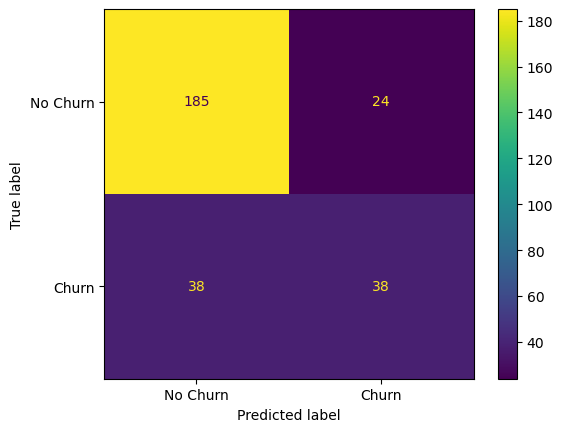

In [516]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tree Model
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=16
)

# validacion
# ** test size por defecto es 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=16)

modelo = DecisionTreeClassifier(max_depth=5, random_state=16)
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_val)

matriz_confusion = confusion_matrix(y_val, y_previsto)

print(f"La precisión del modelo es: {precision_score(y_val, y_previsto)}")
print(f"La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}")
print(f"La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}")
print(f"El F1-score del modelo es: {f1_score(y_val, y_previsto)}")

visualizacion = ConfusionMatrixDisplay(
    matriz_confusion, display_labels=["No Churn", "Churn"]
)
visualizacion.plot()

La precisión del modelo es: 0.7258064516129032
La sensibilidad (Recall) del modelo es: 0.5056179775280899
La exactitud (Accuracy) del modelo es: 0.8184523809523809
El F1-score del modelo es: 0.5960264900662252


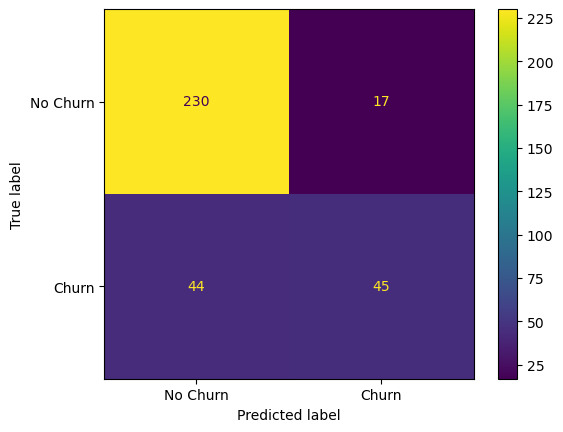

In [515]:
from sklearn.ensemble import RandomForestClassifier

# FOREST Model
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=16
)

# validacion
# ** test size por defecto es 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=16)

modelo = RandomForestClassifier(max_depth=5, random_state=16)
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_val)

matriz_confusion = confusion_matrix(y_val, y_previsto)

print(f"La precisión del modelo es: {precision_score(y_val, y_previsto)}")
print(f"La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}")
print(f"La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}")
print(f"El F1-score del modelo es: {f1_score(y_val, y_previsto)}")

visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No Churn', 'Churn'])
visualizacion.plot()